<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/Lab_Automobile_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
 

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [92]:
# Principales librerías

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [93]:
# Cargar Data

import pandas as pd
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


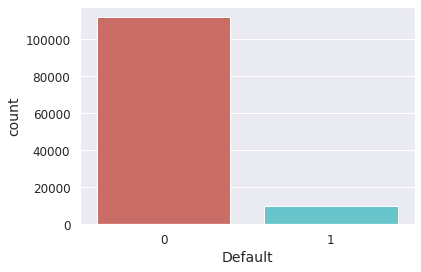

In [94]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [95]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days','Default']))
features

['Workphone_Working',
 'Client_Income',
 'Loan_Annuity',
 'Loan_Contract_Type',
 'Score_Source_1',
 'Client_Family_Members',
 'Client_Income_Type',
 'Client_Housing_Type',
 'Client_Permanent_Match_Tag',
 'House_Own',
 'Child_Count',
 'Bike_Owned',
 'Employed_Days',
 'Age_Days',
 'Own_House_Age',
 'Cleint_City_Rating',
 'Application_Process_Hour',
 'Registration_Days',
 'Application_Process_Day',
 'Credit_Bureau',
 'Mobile_Tag',
 'Homephone_Tag',
 'Score_Source_3',
 'Population_Region_Relative',
 'Active_Loan',
 'Client_Occupation',
 'Credit_Amount',
 'Client_Education',
 'Phone_Change',
 'Accompany_Client',
 'Type_Organization',
 'Client_Marital_Status',
 'Client_Contact_Work_Tag',
 'Car_Owned',
 'Score_Source_2',
 'Client_Gender',
 'Social_Circle_Default']

In [96]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [97]:
pddf.convert_dtypes(infer_objects=True).dtypes 

ID                              Int64
Client_Income                  object
Car_Owned                       Int64
Bike_Owned                      Int64
Active_Loan                     Int64
House_Own                       Int64
Child_Count                     Int64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               string
Client_Income_Type             string
Client_Education               string
Client_Marital_Status          string
Client_Gender                  string
Loan_Contract_Type             string
Client_Housing_Type            string
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                   Int64
Mobile_Tag                      Int64
Homephone_Tag                   Int64
Workphone_Working               Int64
Client_Occupation              string
Client_Famil

In [98]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [99]:
numeric_features = list(set(features) - set(categorical_features))
numeric_features

['Workphone_Working',
 'Client_Income',
 'Loan_Annuity',
 'Score_Source_1',
 'Client_Family_Members',
 'House_Own',
 'Child_Count',
 'Bike_Owned',
 'Employed_Days',
 'Cleint_City_Rating',
 'Age_Days',
 'Own_House_Age',
 'Application_Process_Hour',
 'Registration_Days',
 'Application_Process_Day',
 'Credit_Bureau',
 'Mobile_Tag',
 'Homephone_Tag',
 'Score_Source_3',
 'Population_Region_Relative',
 'Active_Loan',
 'Credit_Amount',
 'Phone_Change',
 'Car_Owned',
 'Score_Source_2',
 'Social_Circle_Default']

In [100]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [101]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [102]:
pddf.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [103]:
# Determinando matrices de datos

X = pddf[features + ['ID', 'Default']]
y = pddf.Default


In [104]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 123)


## 3. Pre-selección de variables

In [105]:
# Estadísticos básicos

df_res = X_train[numeric_features].describe().transpose()
df_res.head()

,count,mean,std,min,25%,50%,75%,max
Workphone_Working,85299.0,0.281926,0.449940,0.000000,0.00000,0.00000,1.000000,1.000000
Client_Income,82766.0,16853.821827,10190.803686,2646.000000,11250.00000,14760.00000,20250.000000,450000.000000
Loan_Annuity,81925.0,2724.754839,1466.162865,217.350000,1660.50000,2501.10000,3469.950000,22500.000000
Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741
Client_Family_Members,83621.0,2.152091,0.909934,1.000000,2.00000,2.00000,3.000000,16.000000


In [106]:
# Dando formato a la data

df_res.reset_index(inplace = True)
df_res.rename(columns = {'index': 'feature',
                         '25%': 'Q1',
                         '50%': 'Median',
                         '75%': 'Q3'}, inplace = True)
df_res.head()

,feature,count,mean,std,min,Q1,Median,Q3,max
0,Workphone_Working,85299.0,0.281926,0.449940,0.000000,0.00000,0.00000,1.000000,1.000000
1,Client_Income,82766.0,16853.821827,10190.803686,2646.000000,11250.00000,14760.00000,20250.000000,450000.000000
2,Loan_Annuity,81925.0,2724.754839,1466.162865,217.350000,1660.50000,2501.10000,3469.950000,22500.000000
3,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741
4,Client_Family_Members,83621.0,2.152091,0.909934,1.000000,2.00000,2.00000,3.000000,16.000000


In [107]:
# Calculando el porcentaje de missings

df_res['missing_rate'] = 1 - df_res['count']/pddf.shape[0]
df_res.head()


,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate
0,Workphone_Working,85299.0,0.281926,0.449940,0.000000,0.00000,0.00000,1.000000,1.000000,0.300002
1,Client_Income,82766.0,16853.821827,10190.803686,2646.000000,11250.00000,14760.00000,20250.000000,450000.000000,0.320788
2,Loan_Annuity,81925.0,2724.754839,1466.162865,217.350000,1660.50000,2501.10000,3469.950000,22500.000000,0.327690
3,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741,0.695296
4,Client_Family_Members,83621.0,2.152091,0.909934,1.000000,2.00000,2.00000,3.000000,16.000000,0.313772


In [108]:
#Calculando el gini univariado de todas las variables

ginisZero = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in numeric_features]


In [109]:
temp = X_train.copy()
temp['y'] = y_train

ginisNan = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in numeric_features]


In [110]:
res_ginis = pd.DataFrame({'feature' : numeric_features,
                          'giniZero' : ginisZero,
                          'giniNan'  : ginisNan})

In [111]:
df_res2 = pd.merge(df_res, res_ginis, on = 'feature', how='left')
df_res2.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan
0,Workphone_Working,85299.0,0.281926,0.449940,0.000000,0.00000,0.00000,1.000000,1.000000,0.300002,-0.042586,-0.042586
1,Client_Income,82766.0,16853.821827,10190.803686,2646.000000,11250.00000,14760.00000,20250.000000,450000.000000,0.320788,-0.037669,-0.040437
2,Loan_Annuity,81925.0,2724.754839,1466.162865,217.350000,1660.50000,2501.10000,3469.950000,22500.000000,0.327690,-0.003493,-0.005418
3,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251
4,Client_Family_Members,83621.0,2.152091,0.909934,1.000000,2.00000,2.00000,3.000000,16.000000,0.313772,0.012385,0.014124


In [ ]:
# Ordenando variables por importancia de explicación

df_res2['abs_giniZero'] = df_res2.giniZero.apply(lambda x: abs(x))
df_res2['abs_giniNan'] = df_res2.giniNan.apply(lambda x: abs(x))

df_res2['abs_ginimax'] = df_res2[['abs_giniZero', 'abs_giniNan']].max(axis = 1)
df_res2.sort_values('abs_ginimax', ascending = False)


In [149]:
df_res2.to_csv('univariate_assesment.csv', index = 0)

## 4. Tratamiento de variables categóricas

In [114]:
categorical_features

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

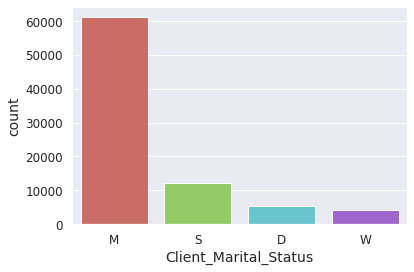

In [115]:
# Analizando variable categórica
sns.countplot(x='Client_Marital_Status', data = X_train, palette = 'hls')

In [116]:
mar_res = X_train.groupby(['Client_Marital_Status']).agg({"ID":"count",
                                                "Default" :"mean"}).reset_index()
mar_res                                                

,Client_Marital_Status,ID,Default
0,D,5288,0.076021
1,M,61181,0.079208
2,S,12110,0.097770
3,W,4329,0.063525


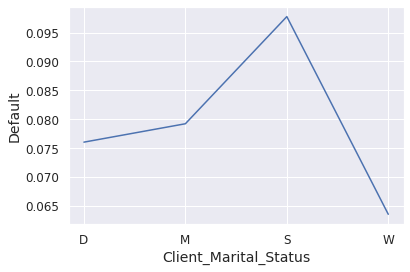

In [117]:
sns.lineplot(x = 'Client_Marital_Status', y = 'Default', data = mar_res)

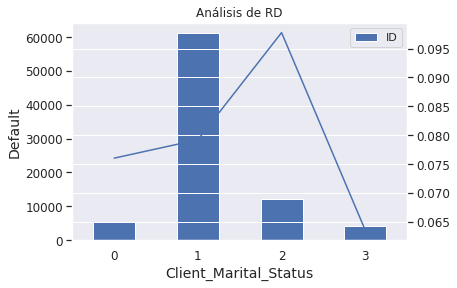

In [118]:
# Title
plt.title('Análisis de RD')
# X label
plt.xlabel('Client_Marital_Status')
# Y label
plt.ylabel('Default')


ax = mar_res['Default'].plot(secondary_y = True)
mar_res[['Client_Marital_Status','ID']].plot(kind='bar', ax=ax)


#### Encoding de variables categóricas


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [119]:
# Reemplazar las filas NaN por una categoría específica para missings 

X_train[categorical_features].fillna('missing', inplace = True)
X_train[categorical_features] = X_train[categorical_features].replace(np.nan,'missing')

X_train[categorical_features].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,missing
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,Business Entity Type 2
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,Self-employed
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,Self-employed
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,Trade: type 3


<h3>One Hot Encoding</h3> 

In [120]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()


In [121]:
# definiendo reglas de encoding

OneHotEncoder.fit(X_train[categorical_features])


OneHotEncoder()

In [122]:
list_dummys = []
for c in categorical_features:
  list_dummys += [c + '_dum' + str(x) for x in range(len(X_train[c].drop_duplicates()))]


In [123]:
list_dummys


['Accompany_Client_dum0',
 'Accompany_Client_dum1',
 'Accompany_Client_dum2',
 'Accompany_Client_dum3',
 'Accompany_Client_dum4',
 'Accompany_Client_dum5',
 'Accompany_Client_dum6',
 'Accompany_Client_dum7',
 'Client_Income_Type_dum0',
 'Client_Income_Type_dum1',
 'Client_Income_Type_dum2',
 'Client_Income_Type_dum3',
 'Client_Income_Type_dum4',
 'Client_Income_Type_dum5',
 'Client_Income_Type_dum6',
 'Client_Income_Type_dum7',
 'Client_Education_dum0',
 'Client_Education_dum1',
 'Client_Education_dum2',
 'Client_Education_dum3',
 'Client_Education_dum4',
 'Client_Education_dum5',
 'Client_Marital_Status_dum0',
 'Client_Marital_Status_dum1',
 'Client_Marital_Status_dum2',
 'Client_Marital_Status_dum3',
 'Client_Marital_Status_dum4',
 'Client_Gender_dum0',
 'Client_Gender_dum1',
 'Client_Gender_dum2',
 'Loan_Contract_Type_dum0',
 'Loan_Contract_Type_dum1',
 'Loan_Contract_Type_dum2',
 'Client_Housing_Type_dum0',
 'Client_Housing_Type_dum1',
 'Client_Housing_Type_dum2',
 'Client_Housing_

In [124]:
# Usando reglas de encoding

X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
X_train[categorical_features + list_dummys].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,...,Type_Organization_dum48,Type_Organization_dum49,Type_Organization_dum50,Type_Organization_dum51,Type_Organization_dum52,Type_Organization_dum53,Type_Organization_dum54,Type_Organization_dum55,Type_Organization_dum56,Type_Organization_dum57
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
X_train[[x for x in X_train.columns.tolist() if 'Marital_Status' in x]].drop_duplicates()

,Client_Marital_Status,Client_Marital_Status_dum0,Client_Marital_Status_dum1,Client_Marital_Status_dum2,Client_Marital_Status_dum3,Client_Marital_Status_dum4
66289,M,0.0,1.0,0.0,0.0,0.0
7076,S,0.0,0.0,1.0,0.0,0.0
81616,D,1.0,0.0,0.0,0.0,0.0
114150,W,0.0,0.0,0.0,1.0,0.0
80118,missing,0.0,0.0,0.0,0.0,1.0


In [126]:
X_train.shape

(85299, 160)

<h3>Target Encoding</h3> 

In [127]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()



/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [129]:
# definiendo reglas de encoding

TargetEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [130]:
# Usando reglas de encoding

X_train[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_train[categorical_features])


In [131]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num
66289,Male,0.0,1.0,0.0,0.070758
7076,Female,1.0,0.0,0.0,0.100146
80118,missing,0.0,0.0,1.0,0.077497


<h3>WOE Encoding</h3> 

In [132]:
# Target Encoding

from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()


In [133]:
# definiendo reglas de encoding

WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [134]:
# Usando reglas de encoding

X_train[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_train[categorical_features])


In [135]:
X_test[categorical_features].fillna('missing', inplace = True)
X_test[categorical_features] = X_test[categorical_features].replace(np.nan,'missing')

X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])
                                                                          

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [136]:
X_test[['Client_Gender','Client_Gender_woe']].drop_duplicates().head()

,Client_Gender,Client_Gender_woe
112057,Male,-0.143422
52578,Female,0.236154
106090,missing,-0.038646


In [137]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num,Client_Gender_woe
66289,Male,0.0,1.0,0.0,0.070758,-0.143422
7076,Female,1.0,0.0,0.0,0.100146,0.236154
80118,missing,0.0,0.0,1.0,0.077497,-0.038646


In [138]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_num)*2-1

0.08893367136772024

In [139]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_woe)*2-1

0.08893367136772024

In [140]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum0)*2-1

0.08774192299640515

In [141]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum1)*2-1

-0.08683733595014442

In [142]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum2)*2-1

-0.0009045870462606187

## 5. Tratamiento de variables numéricas




In [143]:
numeric_features

['Workphone_Working',
 'Client_Income',
 'Loan_Annuity',
 'Score_Source_1',
 'Client_Family_Members',
 'House_Own',
 'Child_Count',
 'Bike_Owned',
 'Employed_Days',
 'Cleint_City_Rating',
 'Age_Days',
 'Own_House_Age',
 'Application_Process_Hour',
 'Registration_Days',
 'Application_Process_Day',
 'Credit_Bureau',
 'Mobile_Tag',
 'Homephone_Tag',
 'Score_Source_3',
 'Population_Region_Relative',
 'Active_Loan',
 'Credit_Amount',
 'Phone_Change',
 'Car_Owned',
 'Score_Source_2',
 'Social_Circle_Default']

In [144]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

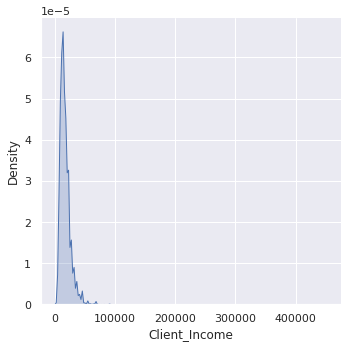

In [145]:
#sns.displot(X_train, x = 'Client_Income', bins=30, kde=True)
sns.displot(X_train, x = "Client_Income", kind="kde", fill=True)

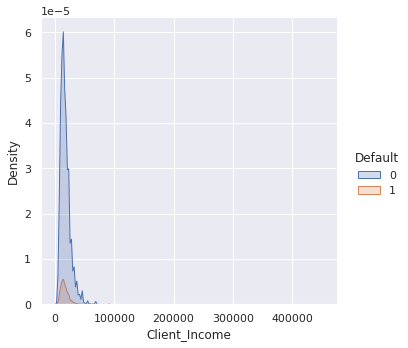

In [146]:
sns.displot(X_train, x="Client_Income", hue='Default', kind="kde", fill=True)

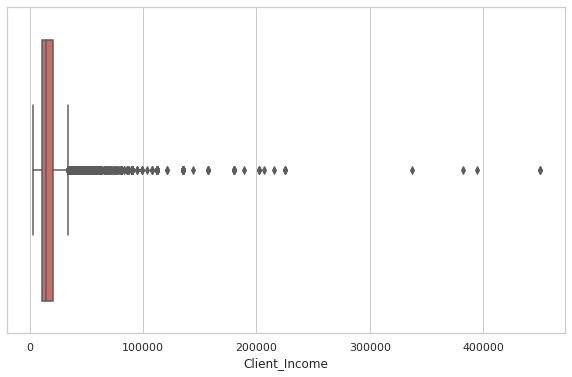

In [147]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Client_Income", data = X_train, palette = 'hls')

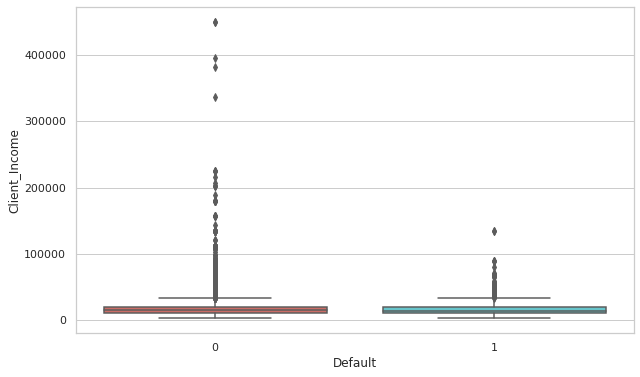

In [148]:
ax = sns.boxplot(x="Default", y="Client_Income", data=X_train, palette = 'hls')


<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

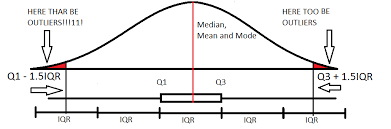 

In [151]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv').sort_values(by = 'abs_ginimax', ascending = False)
univariate_II = univariate_II.loc[univariate_II.abs_ginimax > 0.025]

univariate_II.head() 

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax
18,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416
3,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251
24,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939
8,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437
10,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875


In [152]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,ric,min_ric,max_ric
18,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.295124,-0.070352,1.110144
3,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.340597,-0.178145,1.184242
24,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939,0.273075,-0.018698,1.073603
8,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437,4694.000000,-6110.000000,12666.000000
10,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875,7272.000000,1491.000000,30579.000000


In [153]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

,Workphone_Working,Client_Income,Loan_Annuity,Loan_Contract_Type,Score_Source_1,Client_Family_Members,Client_Income_Type,Client_Housing_Type,Client_Permanent_Match_Tag,House_Own,...,Registration_Days_tric,Population_Region_Relative_tric,Application_Process_Hour_tric,Car_Owned_tric,Workphone_Working_tric,Credit_Amount_tric,Client_Income_tric,Credit_Bureau_tric,Child_Count_tric,Homephone_Tag_tric
66289,0,14400.0,6269.85,CL,NaN,2.0,Commercial,Home,Yes,1.0,...,90.0,0.028663,12.0,0.0,0,161662.50,14400.0,3.0,0.0,0.0
109009,0,6750.0,1524.15,CL,0.464453,3.0,Commercial,Home,Yes,0.0,...,2684.0,0.030755,18.0,0.0,0,15282.00,6750.0,NaN,1.0,0.0
30526,1,NaN,3930.75,CL,0.572723,3.0,Service,Home,Yes,1.0,...,5614.0,0.035792,15.0,0.0,1,49752.00,NaN,2.0,1.0,0.0
117872,0,11250.0,3302.55,CL,NaN,2.0,Service,Home,Yes,1.0,...,506.0,0.014520,12.0,1.0,0,112500.00,11250.0,5.0,0.0,0.0
90866,0,10800.0,5215.50,CL,NaN,2.0,Service,missing,No,0.0,...,4813.0,0.008866,11.0,0.0,0,122790.15,10800.0,0.0,0.0,0.0


Revisemos los resultados

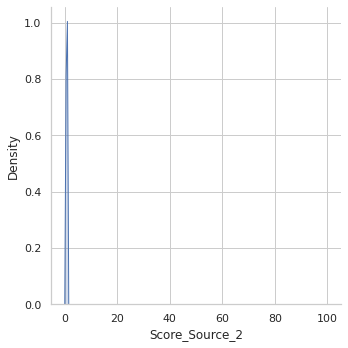

In [154]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

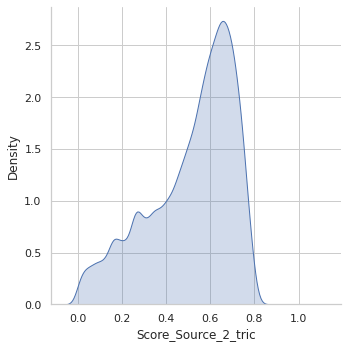

In [155]:
sns.displot(X_train, x = "Score_Source_2_tric", kind="kde", fill=True)

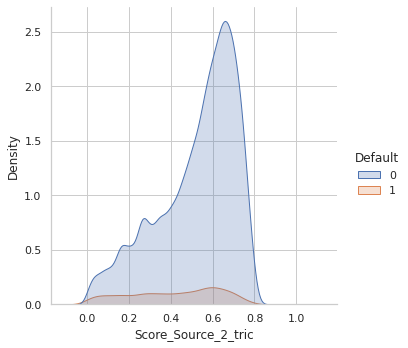

In [156]:
sns.displot(X_train, x="Score_Source_2_tric", hue='Default', kind="kde", fill=True)

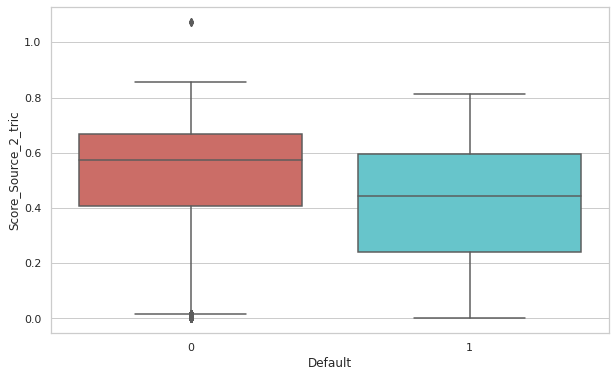

In [157]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tric", data=X_train, palette = 'hls')

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "Score_Source_2_tzscore", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x="Score_Source_2_tzscore", hue='Default', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tzscore", data=X_train, palette = 'hls')

In [ ]:
#Calculando el gini univariado de todas las variables

features_outtreat_zscore = [x  + '_tzscore' for x in univariate_II.feature.tolist()]
features_outtreat_tric = [x  + '_tric' for x in univariate_II.feature.tolist()]


In [ ]:
#Calculando el gini univariado de todas las variables

ginisZeroZscore = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_zscore]
ginisZeroTric = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_tric]


In [ ]:
temp = X_train.copy()
temp['y'] = y_train

ginisNanZscore = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_zscore]
ginisNanTric = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_tric]


In [ ]:
res_ginis2 = pd.DataFrame({'feature' : univariate_II.feature.tolist(),
                          'giniZeroZscore' : ginisZeroZscore,
                          'giniZeroTric' : ginisZeroTric,
                          'giniNanZscore' : ginisNanZscore,
                          'giniNanTric'  : ginisNanTric})

In [ ]:
univariate_III = pd.merge(univariate_II, res_ginis2, on = 'feature', how='left')
univariate_III[['feature'] + [x for x in univariate_III.columns.tolist() if 'gini' in x]].head(10)

### Tratamiento de Missings

In [ ]:
# Trataiento de missings

data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
data[[x + '_t' for x in numFeatures]].head(30)

In [ ]:
X_train.groupby(['Client_Gender']).agg({"ID":"count",
                                        "Default" :"mean"}).reset_index()